Predicting Price of House using KNearestNeighbour Regressor

   Unnamed: 0      Sqft  Floor  TotalFloor  Bedroom  Living.Room  Bathroom  \
0           1  1177.698      2           7        2            2         2   
1           2  2134.800      5           7        4            2         2   
2           3  1138.560      5           7        2            2         1   
3           4  1458.780      2           7        3            2         2   
4           5   967.776     11          14        3            2         2   

   Price  
0  62000  
1  78000  
2  58000  
3  45000  
4  45000  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 645 entries, 0 to 644
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   645 non-null    int64  
 1   Sqft         645 non-null    float64
 2   Floor        645 non-null    int64  
 3   TotalFloor   645 non-null    int64  
 4   Bedroom      645 non-null    int64  
 5   Living.Room  645 non-null    int64  
 6   Bathroom     645 non

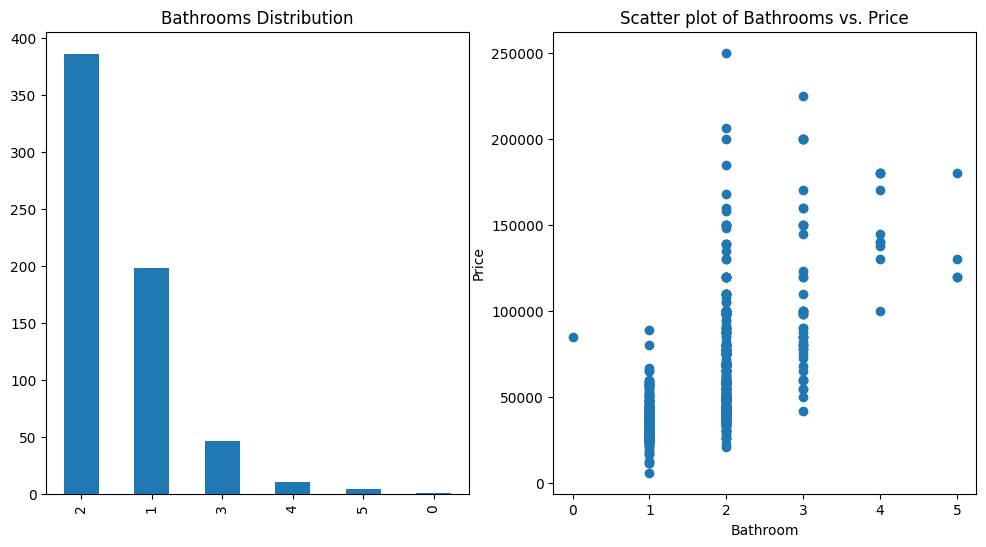

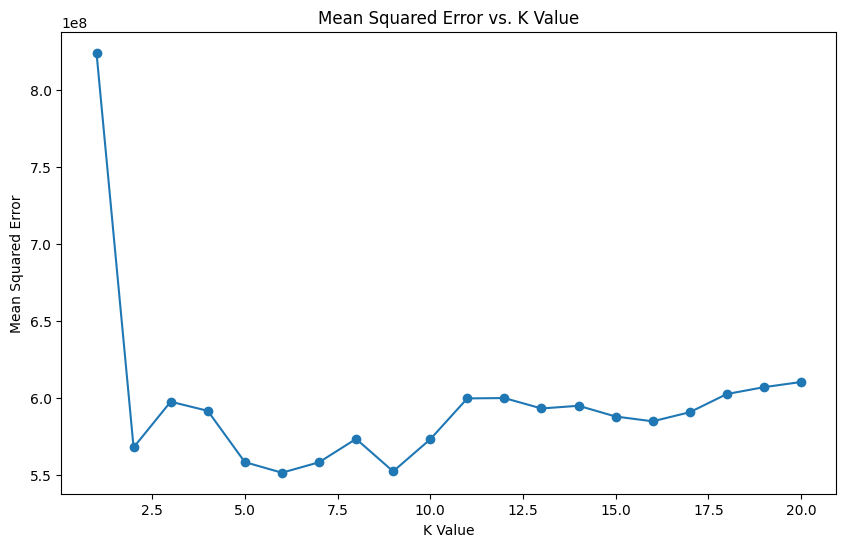

Best value of k: 6


KNeighborsRegressor(n_neighbors=6)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# Load the dataset
url = "https://github.com/edyoda/data-science-complete-tutorial/raw/master/Data/house_rental_data.csv.txt"
df = pd.read_csv(url)

# Explore the data
print(df.head())
print(df.info())
print(df.describe())

# Visualize the data
# Example: Distribution of 'bathrooms' and 'price'
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
df['Bathroom'].value_counts().plot(kind='bar', title='Bathrooms Distribution')

plt.subplot(1, 2, 2)
plt.scatter(df['Bathroom'], df['Price'])
plt.title('Scatter plot of Bathrooms vs. Price')
plt.xlabel('Bathroom')
plt.ylabel('Price')
plt.show()

# Manage data for training & testing
X = df.drop(['Price'], axis=1)  # Features
y = df['Price']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Finding a better value of k
mse_values = []
k_values = list(range(1, 21))

for k in k_values:
    model = KNeighborsRegressor(n_neighbors=k)
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    mse = mean_squared_error(y_test, y_pred)
    mse_values.append(mse)

# Plot the mean squared error for different k values
plt.figure(figsize=(10, 6))
plt.plot(k_values, mse_values, marker='o')
plt.title('Mean Squared Error vs. K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Squared Error')
plt.show()

# Find the k value with the lowest mean squared error
best_k = k_values[np.argmin(mse_values)]
print(f"Best value of k: {best_k}")

# Train the final model with the best k value
final_model = KNeighborsRegressor(n_neighbors=best_k)
final_model.fit(X_train_scaled, y_train)
